In [14]:
import numpy as np
import matplotlib.pyplot as plt

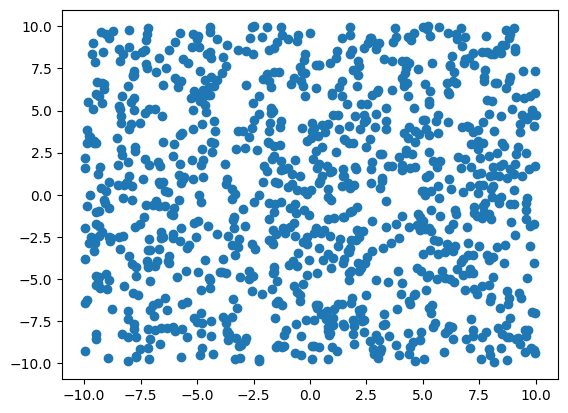

In [15]:
#multilayer perceptron

#creating dataset
x=np.random.uniform(-10,10,1000)
y=np.random.uniform(-10,10,1000)
plt.scatter(x,y)



(-11.0, 11.0)

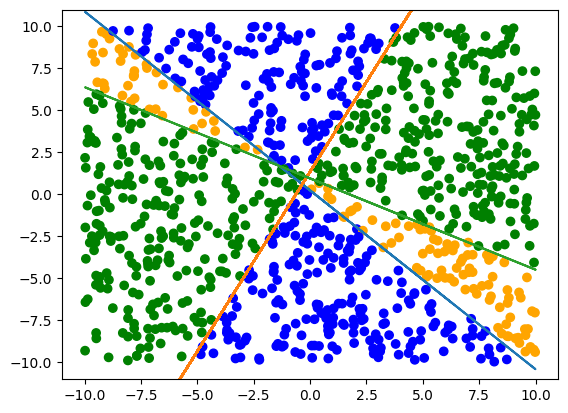

In [16]:


#random bias
b=np.random.uniform(-2,2,3)
#random slopes
w=np.random.uniform(-3,3,3)
#creating labels
labels=[]
ylabels=[]
for i in range(len(x)):
    if((w[0]*x[i]+b[0]<=y[i] and w[1]*x[i]+b[1]<=y[i] and w[2]*x[i]+b[2]<=y[i]) or (w[0]*x[i]+b[0]>=y[i] and w[1]*x[i]+b[1]>=y[i] and w[2]*x[i]+b[2]>=y[i])):
        labels.append('blue')
    elif((w[0]*x[i]+b[0]>=y[i] and w[1]*x[i]+b[1]<=y[i] and w[2]*x[i]+b[2]<=y[i]) or (w[0]*x[i]+b[0]<=y[i] and (w[1]*x[i]+b[1])>=y[i] and w[2]*x[i]+b[2]>=y[i])):
        labels.append('orange')
    else:
        labels.append('green')
    if(labels[i]=='blue'):
        ylabels.append(0)
    elif(labels[i]=='green'):
        ylabels.append(1)
    else:
        ylabels.append(2)
        
labels=np.array(labels)
color=['blue','orange','green']

yinlabels=np.array(ylabels)

plt.scatter(x,y,color=labels)
plt.plot(x,w[0]*x+b[0],label='line1')
plt.plot(x,w[1]*x+b[1],label='line2')
plt.plot(x,w[2]*x+b[2],label='line2')
plt.ylim(-11,11)
plt.xlim(-11,11)


In [17]:
#now making a classifier multi class perceptron to 
#estimate those lines just by giving input as scatterpoints and labels
#2 feature input x,y
# since there are 3 option we can go with a hidden linear layer with 3 nodes and activation function as ReLU
X=x,y # making input as one matrix
X=np.transpose(X)
print(yinlabels)
yinlabels[:,np.newaxis]
y0=[]
for i in range(len(yinlabels)):
    if(yinlabels[i]==0):
        y0.append([1,0,0])
    elif(yinlabels[i]==1):
        y0.append([0,1,0])
    else:
        y0.append([0,0,1])
ylabels=y0
ylabels=np.array(ylabels)
print(ylabels)

[0 0 0 1 0 2 0 1 1 2 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 2 1 2 1 1 2 1 1 0 1 0
 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 2 0 2 2 1 0 1 1 0 0 0 1 0 1 0 2 0 0 1
 1 1 0 1 1 1 0 1 0 1 0 1 0 2 0 0 1 0 1 1 1 1 1 1 0 2 1 0 0 1 0 0 1 1 1 2 2
 1 1 1 0 1 0 0 0 1 0 2 1 1 1 1 2 0 1 0 0 2 1 1 0 1 1 0 2 0 1 1 0 1 1 1 2 2
 0 2 0 1 0 0 2 1 0 1 1 1 2 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 2 2 2 2 2 1 2 1
 0 1 1 0 2 1 0 1 1 0 2 0 1 1 1 1 0 2 0 1 0 2 2 0 1 0 0 1 0 0 2 1 2 0 1 1 1
 1 1 2 0 1 0 0 2 0 1 1 2 2 2 1 1 2 1 0 1 1 1 1 1 2 1 1 1 1 1 0 1 1 1 2 0 0
 2 1 0 1 1 1 1 0 1 1 1 2 1 0 0 2 0 0 2 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0
 1 1 0 2 0 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 2 2 1 0 0 2 0 2 0 1 1 0 1 1
 1 0 1 1 0 0 2 2 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0
 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 2 1 1 1 1 1 1 1 0 1 1 2 1 0 0 1 1 2 0 1 0 1
 1 1 2 2 1 0 1 0 1 1 0 1 2 0 2 0 0 0 0 1 0 1 1 0 0 2 1 1 0 1 1 1 1 1 1 1 1
 0 1 1 1 0 1 1 1 2 1 0 0 1 1 2 1 1 2 1 0 1 1 0 1 1 1 1 1 1 2 1 0 1 2 2 0 2
 1 1 0 1 0 1 1 1 1 2 1 1 

In [18]:
class hidden(object):
    
    def __init__(self,nodes1):
        print('hidden layer constructor called')
        self.hidden1nodes=nodes1
        self.labels=ylabels
    def params_init(self,p1,lr):
        # 6 nodes
        self.b=np.zeros(shape=(1,self.hidden1nodes))
#         self.W=np.random.randn(self.hidden1nodes,2)
        self.W=p1
        self.dW=np.zeros(shape=(self.hidden1nodes,2))
        self.db=np.zeros(shape=(1,self.hidden1nodes))
        self.lr=lr
        print("param_init_called")
        return 1
    def forward(self,X): # X: batch_size,2
        # return (batch_size,6)
        self.X=X
        return np.maximum(np.dot(X,self.W.T)+self.b,0)
    def backward(self,delta): # delta: batch_size,6
        self.dW= np.dot(np.transpose(delta),self.X)
        self.db= np.sum(delta,axis=0)
        return np.dot(delta,self.W)
    def gd_update(self):
        self.W=self.W-np.multiply(self.lr,self.dW)
        self.b=self.b-np.multiply(self.lr,self.db)
    
        

In [19]:
class hidden2(object):
    
    def __init__(self,nodes1):
        print('hidden2 layer constructor called')
        self.hidden1nodes=nodes1
        self.labels=ylabels
    def params_init(self,p2,lr):
        # 3 nodes
        self.b=np.zeros(shape=(1,3))
#         self.W=np.random.randn(3,self.hidden1nodes)
        self.W=p2
        self.dW=np.zeros(shape=(3,self.hidden1nodes))
        self.db=np.zeros(shape=(1,3))
        self.lr=lr
        print("param_init_called")
        return 1
    def forward(self,X): # X: batch_size,6
        # return (batch_size,6)
        self.X=X
#         self.forw=np.maximum(np.dot(X,self.W.T)+self.b,0)
#         print("forw shape",self.forw.shape)
#         a=np.maximum(np.dot(X,self.W.T)+self.b,0)
#         print("np.max of",a.shape)
        return np.maximum(np.dot(X,self.W.T)+self.b,0)
    def backward(self,delta): # delta: batch_size,6
        self.dW= np.dot(np.transpose(delta),self.X)
        self.db= np.sum(delta,axis=0).reshape(1,3)
#         a=np.where(np.maximum(self.forw,0)==0,0,np.dot(delta,self.W))
#         print('a',a.shape)
        return np.dot(delta,self.W)
    def gd_update(self):
       
        
        self.W=self.W-(self.lr*self.dW)
        self.b=self.b-(self.lr*self.db)

In [20]:

class softmax:
    def __init__(self, ylabels):
        print('Softmax constructor called')
        self.nodes = 3
        self.labels = ylabels
        self.softmax = None

    def forward(self, X):
        
        max_scores = np.max(X, axis=1,keepdims=True)
#         max_scores[:,np.newaxis]
#         print("max score",max_scores.shape)
#         print("X",X.shape)
        expa=X-max_scores
        exp_scores = np.exp(expa)
#         print(X.shape)
#         denom=np.sum(expa, axis=1, keepdims=True)
#         print(denom)
        self.softmax = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
#         print("the fraction",self.softmax)
        return self.softmax

    def backward(self,delta):
        return (self.softmax - self.labels)

In [21]:

class crossentropy:
    def __init__(self):
        print("Cross Entropy constructor called")
        self.y_true = None
        self.y_pred = None

    def forward(self, y_pred, y_true):
        self.y_pred = y_pred
        self.y_true = y_true
       
        log_y_pred = np.log(y_pred + 1e-10)  # Adding a small value to avoid log(0)
        return -np.sum(y_true * log_y_pred) / y_pred.shape[0]

    def backward(self):
        return -self.y_true / (self.y_pred + 1e-10)  # Adding a small value to avoid division by zero


In [22]:
class Linking_Networks:
    def __init__(self,X,ylabels,nodes1,p1,p2,lr):
        print('Training Started')
        self.hidden = hidden(nodes1)
        self.hidden.params_init(p1,lr)
        self.hidden2 = hidden2(nodes1)
        self.hidden2.params_init(p2,lr)
#         self.output = output()
#         self.output.params_init()
        
        self.X=X
        self.labels=ylabels
        
        self.softmax=softmax(ylabels)
        self.crossentropy=crossentropy()
        
        
    def forward(self):
        hidden_layer_output=self.hidden.forward(self.X)
        hidden_layer_output2=self.hidden2.forward(hidden_layer_output)
#         output1=self.output.forward(hidden_layer_output2)
        softmax_output=self.softmax.forward(hidden_layer_output2)
        output=self.crossentropy.forward(softmax_output,ylabels)
        return output
    def backward(self):
        cross_back=self.crossentropy.backward()
        soft_back=self.softmax.backward(cross_back)
#         out1=self.output.backward(soft_back)
        hidden2_back=self.hidden2.backward(soft_back)
        hidden_back=self.hidden.backward(hidden2_back)
        return hidden_back
    def update(self):
        self.hidden2.gd_update()
        self.hidden.gd_update()
    def forward_test(self):
        hidden_layer_output=self.hidden.forward(self.X)
        hidden_layer_output2=self.hidden2.forward(hidden_layer_output)
#         output1=self.output.forward(hidden_layer_output2)
        softmax_output=self.softmax.forward(hidden_layer_output2)
        return softmax_output
    
        

        

# HyperParameter Tuninng

Training Started
hidden layer constructor called
param_init_called
hidden2 layer constructor called
param_init_called
Softmax constructor called
Cross Entropy constructor called
initial loss: 2.4075565056535893
final loss: 1.2048386627728864
1
training_accuracy 0.385
Training Started
hidden layer constructor called
param_init_called
hidden2 layer constructor called
param_init_called
Softmax constructor called
Cross Entropy constructor called
initial loss: 4.544353707974459
final loss: 1.0456215408709686
2
training_accuracy 0.399
Training Started
hidden layer constructor called
param_init_called
hidden2 layer constructor called
param_init_called
Softmax constructor called
Cross Entropy constructor called
initial loss: 4.200000948303598
final loss: 0.683600740099451
3
training_accuracy 0.757
Training Started
hidden layer constructor called
param_init_called
hidden2 layer constructor called
param_init_called
Softmax constructor called
Cross Entropy constructor called
initial loss: 2.92183

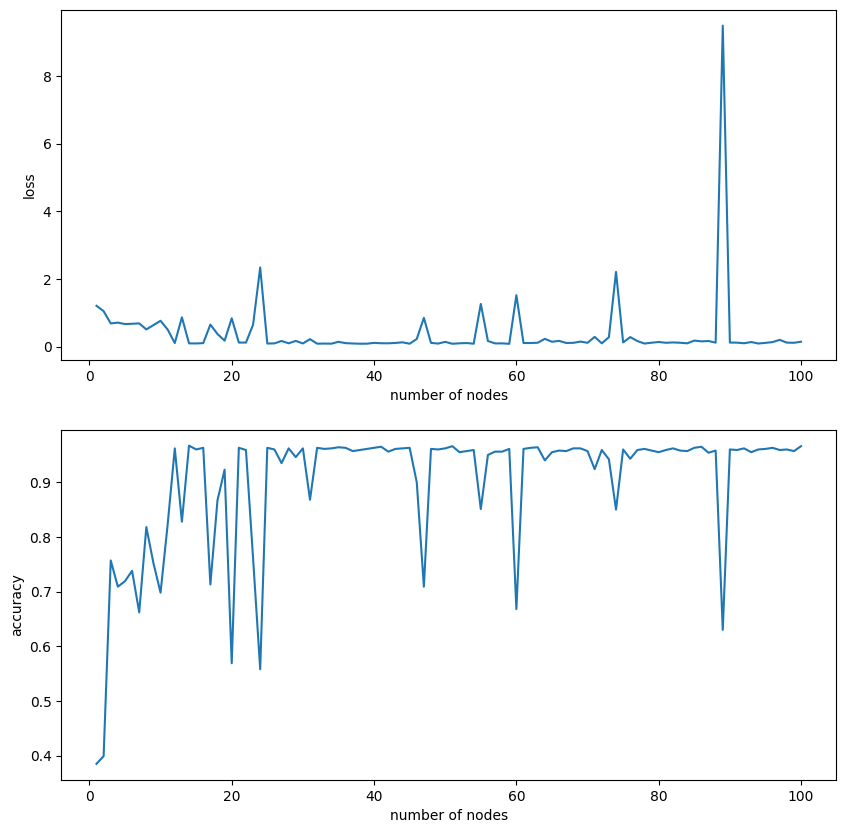

In [23]:
metric=[]
training=[]

lr=0.0001
for j in range(1,101):
    p1=np.random.randn(j,2) 
    p2=np.random.randn(3,j)
    Model=Linking_Networks(X,ylabels,j,p1,p2,lr)
    for i in range(1000):
        loss=np.sum(Model.forward())
        if(i==0):
            print("initial loss:",loss)
    #     print(loss)
    #     print(Model.hidden.W)
        Model.backward()
        Model.update()
    metric.append(loss)
    print('final loss:',loss)
    print(j)
    
    
    b=Model.forward_test()
    # print(b.shape)
    a=np.argmax(b,axis=1,keepdims=True)
    b=np.argmax(ylabels,axis=1,keepdims=True)
    error=0
    for i in range(1000):
        if(a[i]!=b[i]):
            error+=1
    # print(error)
    training_accuracy=1-(error/1000)
    print("training_accuracy",training_accuracy)
    training.append(training_accuracy)
X1=np.linspace(1,100,100)
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(X1,metric)
plt.xlabel("number of nodes")
plt.ylabel("loss")
plt.subplot(2,1,2)
plt.plot(X1,training)
plt.xlabel("number of nodes")
plt.ylabel("accuracy")
plt.show()
    

# 45 nodes in one layer performs best

Training Started
hidden layer constructor called
param_init_called
hidden2 layer constructor called
param_init_called
Softmax constructor called
Cross Entropy constructor called
initial loss: 12.738013219887351
final loss: 0.18593409782592227
1
training_accuracy 0.906
Training Started
hidden layer constructor called
param_init_called
hidden2 layer constructor called
param_init_called
Softmax constructor called
Cross Entropy constructor called
initial loss: 12.738013219887351
final loss: 0.1404143211230286
2
training_accuracy 0.942
Training Started
hidden layer constructor called
param_init_called
hidden2 layer constructor called
param_init_called
Softmax constructor called
Cross Entropy constructor called
initial loss: 12.738013219887351
final loss: 0.11856104758524526
3
training_accuracy 0.954
Training Started
hidden layer constructor called
param_init_called
hidden2 layer constructor called
param_init_called
Softmax constructor called
Cross Entropy constructor called
initial loss: 12

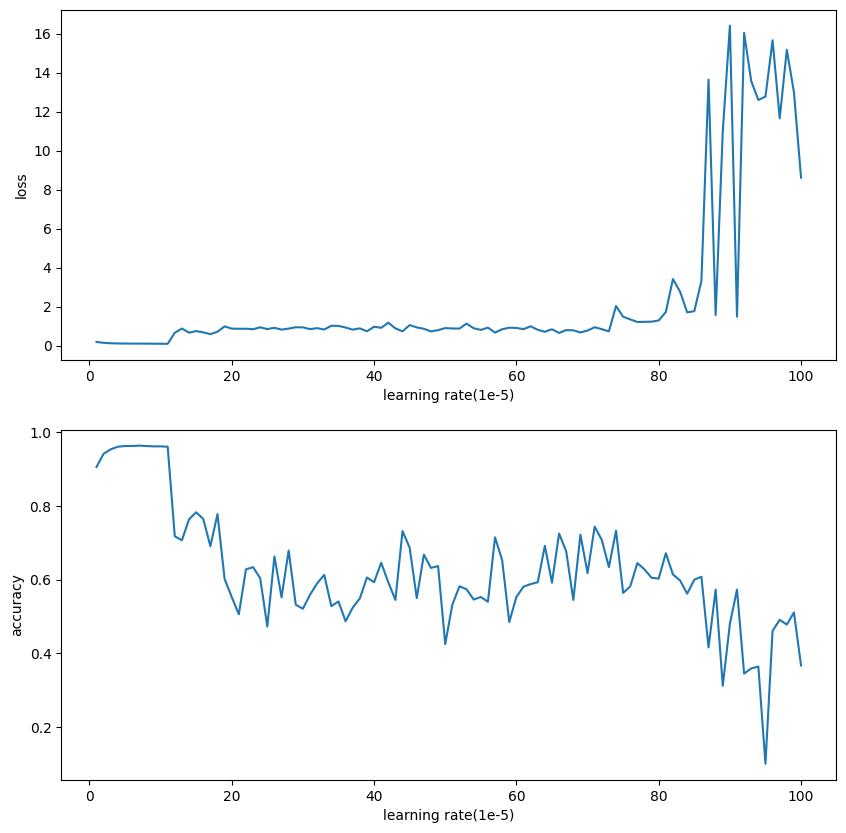

In [24]:
metric=[]
training=[]
p1=np.random.randn(45,2) 
p2=np.random.randn(3,45)
lr=0.00001
for j in range(1,101):
    
    Model=Linking_Networks(X,ylabels,45,p1,p2,lr*j)
    for i in range(1000):
        loss=np.sum(Model.forward())
        if(i==0):
            print("initial loss:",loss)
    #     print(loss)
    #     print(Model.hidden.W)
        Model.backward()
        Model.update()
    metric.append(loss)
    print('final loss:',loss)
    print(j)
    
    
    b=Model.forward_test()
    # print(b.shape)
    a=np.argmax(b,axis=1,keepdims=True)
    b=np.argmax(ylabels,axis=1,keepdims=True)
    error=0
    for i in range(1000):
        if(a[i]!=b[i]):
            error+=1
    # print(error)
    training_accuracy=1-(error/1000)
    print("training_accuracy",training_accuracy)
    training.append(training_accuracy)
X1=np.linspace(1,100,100)
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(X1,metric)
plt.xlabel("learning rate(1e-5)")
plt.ylabel("loss")
plt.subplot(2,1,2)
plt.plot(X1,training)
plt.xlabel("learning rate(1e-5)")
plt.ylabel("accuracy")
plt.show()

# (7 to 8)* 1e-5  is performing best as learning rate

In [26]:
p1=np.random.randn(45,2) 
p2=np.random.randn(3,45)
Tuned_model=Linking_Networks(X,ylabels,45,p1,p2,7e-5)

# print(b.shape)
for i in range(1000):
    Tuned_model.forward()
    loss=np.sum(Tuned_model.forward())
    Tuned_model.backward()
    Tuned_model.update()
#     print("loss",loss)
    a=Tuned_model.forward_test()
    a=np.argmax(a,axis=1,keepdims=True)
    b=np.argmax(ylabels,axis=1,keepdims=True)
    error=0
for i in range(1000):
    if(a[i]!=b[i]):

        error+=1
#     print(error)
training_accuracy=1-(error/1000)
print("training_accuracy",training_accuracy)

Training Started
hidden layer constructor called
param_init_called
hidden2 layer constructor called
param_init_called
Softmax constructor called
Cross Entropy constructor called
training_accuracy 0.96


# Since the data are linearly separable. Any random testing data will also perform the same way as the training did.